In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
%whos

Variable   Type      Data/Info
------------------------------
pd         module    <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
sns        module    <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>


In [2]:
df_census = pd.read_csv("2011 Census Microdata Teaching File.csv", skiprows = 1, index_col = 'Person ID')
df_census.head()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
Person ID,,,,,,,,,,,,,,,,,
7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2


In [3]:
df_eco_sex = df_census[['Economic Activity', 'Sex']]
df_eco_sex.head()
#first set of double brackets to say "I'm going to restrict this df"
#second set to explain that this will be restricted by more than one thing, and is passed throught as a list

,Economic Activity,Sex
Person ID,,
7394816,5,2
7394745,1,1
7395066,1,2
7395329,1,2
7394712,1,1


In [5]:
gb_eco_sex = df_eco_sex.groupby(['Economic Activity', 'Sex']).size()
#grouping the data frame
gb_eco_sex
#showing the data frame

Economic Activity  Sex
-9                 1       57809
                   2       54809
 1                 1      107997
                   2      108028
 2                 1       28790
                   2       11842
 3                 1       10760
                   2        7349
 4                 1        6587
                   2        7530
 5                 1       40605
                   2       56875
 6                 1       12620
                   2       12136
 7                 1        1715
                   2       16230
 8                 1        9222
                   2        8769
 9                 1        4464
                   2        5604
dtype: int64

In [7]:
gb_eco_sex = gb_eco_sex.reset_index()
#this rests the index so economic activity and sex are columnes not indexs
gb_eco_sex

,index,Economic Activity,Sex,0
0,0,-9,1,57809
1,1,-9,2,54809
2,2,1,1,107997
3,3,1,2,108028
4,4,2,1,28790
5,5,2,2,11842
6,6,3,1,10760
7,7,3,2,7349
8,8,4,1,6587
9,9,4,2,7530


In [9]:
gb_eco_sex = gb_eco_sex.rename(columns = {0 : 'count'})
gb_eco_sex

,index,Economic Activity,Sex,count
0,0,-9,1,57809
1,1,-9,2,54809
2,2,1,1,107997
3,3,1,2,108028
4,4,2,1,28790
5,5,2,2,11842
6,6,3,1,10760
7,7,3,2,7349
8,8,4,1,6587
9,9,4,2,7530


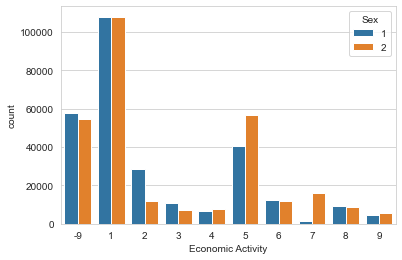

In [13]:
bar_plot = sns.barplot(data = gb_eco_sex, x = 'Economic Activity', y = 'count', hue = 'Sex' )

In [18]:
#defining our own function
def agg_graph_maker(df, col_x, col_hue):
    col_list = [col_x, col_hue]
    df = df[col_list]
    gb = df.groupby(col_list).size()
    gb = gb.reset_index()
    gb = gb.rename(columns = {0 : 'count'})
    bar = sns.barplot(data = gb, x = col_x, y = "count", hue = col_hue)
    return bar


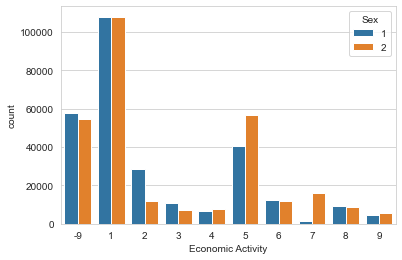

In [19]:
agg_graph_maker(df_census, "Economic Activity", "Sex")

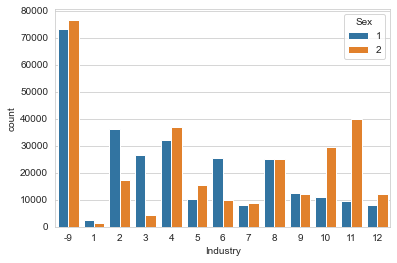

In [20]:
agg_graph_maker(df_census, "Industry", "Sex" )